# Vorhersage machen mithilfe des trainierten, auf dem VGG16-basierten, Modells

## 1. Laden des DogVsCat-Modells

In [48]:
import os
from keras.models import load_model

# Modell-Pfad anpassen/auskommentieren je nach verwendetem Modell
model_path = "data/dogs_vs_cats_model.keras"
#model_path = "data/dogs_vs_cats_VGG16model.keras"
    
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print("Data file not found. Please make sure the file exists.")


Model loaded successfully.


### Schritt 1: Daten einlesen

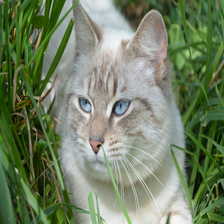

In [49]:
from PIL import Image

# Bildauswahl basierend auf Auswahlvariable
image_choice = "cat"  # "dog", "cat" oder "pipa"

if image_choice == "dog":
    image_file = "dog.jpg"
    image = Image.open(image_file)
elif image_choice == "cat":
    image_file = "cat.jpg"
    image = Image.open(image_file)
elif image_choice == "pipa":
    image_file = "pipa.jpg"
    image = Image.open(image_file)
    # Zuschneiden auf quadratisches Format
    image = image.crop((200, 450, 724, 1024))
else:
    raise ValueError("Ungültige Auswahl für image_choice. Bitte 'dog', 'cat' oder 'pipa' verwenden.")

# Bild auf 224x224 Pixel skalieren
image.resize((224, 224), Image.LANCZOS)


### Schritt 2: Daten vorbereiten

- Skalieren auf 224x224 Pixel
- Ggf. sicherstellen, dass wir 3 Farbkanäle haben
- In ein Numpy-Array umwandeln (Shape!)
- Die `preprocess_input`-Funktion aus dem `keras.applications.vgg16`-Paket verwenden

In [50]:
import numpy as np
from keras.applications.vgg16 import preprocess_input

image = image.resize((224, 224), Image.LANCZOS)
image = np.asarray(image).reshape(1, 224, 224, 3)
image = preprocess_input(image)

### Schritt 3: VGG16 laden, und `X_after_vgg` berechnen

In [51]:
from keras.applications.vgg16 import VGG16

vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
X_after_vgg = vgg16_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [52]:
X_after_vgg.shape

(1, 7, 7, 512)

### Schritt 4: Mit eigenem Modell die Wahrscheinlichkeit für eine Katze berechnen

In [53]:
if model_path == "data/dogs_vs_cats_VGG16model.keras":
    pred = model.predict(X_after_vgg)
else:
    pred = model.predict(image)

# Vorhersage ausgeben
print("Wahrscheinlichkeit für Katze: %.2f%%" %(pred[0][0]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Wahrscheinlichkeit für Katze: 100.00%
